# Introduction to random generation of Latitude values.

In [1]:
# Import the dependencies
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import the requests library
import requests
# Import the API key.
from config import weather_api_key

# Create Latitude and Longitude Combinations

In [2]:
# Create a set of random latitude and longitude combinations

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# The zip() object packs each pair of lats and lngs having the same index in their
# respective arrays into a tuple.

# If there are 1500 lats and longs, there will be 1500 tuples of paired lats and lngs, where
# each latitude and longitude in a tuple can be accessed by the index of 0 and 1, respectively.

In [3]:
# Let's practice zipping a small number of latitudes and longitudes and then unpacking the zipped tuple
# to see how the packing and unpacking work.


## See API_practice.ipynb

In [4]:
# Add the latitudes and longitudes to a list.

coordinates = list(lat_lngs)
coordinates

# NOTE: You can only UNZIP a tuple ONCE before it is removed from the computer's memory.
# That is the reason that I commented out the previous line of code.

[(46.39075711429243, 133.59633034725078),
 (6.628753671121345, -93.33907412383655),
 (12.102585433435962, -115.45795855228042),
 (4.522011751483149, 86.05205781422347),
 (-19.083071512102663, -97.54418255612812),
 (60.06407981978515, -119.06672872046721),
 (82.03727836983418, 134.22172691088076),
 (-84.97542812055654, -178.67867593489927),
 (-52.962247512791265, -139.00496826875158),
 (-64.14827195837157, -2.126037724805485),
 (-86.39423991204013, -135.64930022020496),
 (84.45284554114446, 144.26986843935094),
 (-13.00180186419341, -0.9636005779968855),
 (82.98810424890377, -132.9445951130838),
 (-38.86248894741635, 43.54800982060186),
 (83.72689646788012, -166.84522469286532),
 (55.60486112491546, 179.15792599395627),
 (70.2980628472238, 176.27327672123414),
 (-61.29062434762952, -129.97096310991245),
 (-59.44159539875482, 19.969107625591192),
 (-45.71463283729657, -105.32642089309758),
 (14.634877757704444, 148.30183178155062),
 (-85.05797517251114, 30.723665663678958),
 (-4.93520837

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

dalnerechensk ru
puerto san jose gt
cabo san lucas mx
kataragama lk
puerto ayora ec
fort st. john ca
tiksi ru
waitangi nz
adamstown pn
edinburgh of the seven seas sh
waitangi nz
ust-nera ru
jamestown sh
whitehorse ca
tranovaho mg
bethel us
anadyr ru
anadyr ru
adamstown pn
bredasdorp za
chonchi cl
saipan mp
port elizabeth za
tangalle lk
port-aux-francais tf
st. john's ca
talnakh ru
gurupa br
sona pa
thompson ca
bethel us
lompoc us
grytviken gs
port-aux-francais tf
west island cc
iskateley ru
arraial do cabo br
afaahiti pf
gadzhiyevo ru
enewetak mh
hermanus za
vingt cinq mu
thunder bay ca
nikolayevsk-on-amure ru
bethel us
newman au
adamstown pn
blackmans bay au
margate za
ushuaia ar
las tablas pa
port augusta au
port-aux-francais tf
meulaboh id
igarape acu br
okha ru
port-aux-francais tf
itaituba br
edinburgh of the seven seas sh
blackmans bay au
gadzhiyevo ru
adamstown pn
puerto ayora ec
quellon cl
tanda eg
jamestown sh
port alfred za
qamdo cn
coquimbo cl
yellowknife ca
adamstown pn
pue

invercargill nz
margaret river au
yellowknife ca
okhotsk ru
papao pf
cabedelo br
soledad de graciano sanchez mx
ushuaia ar
bilibino ru
puerto ayora ec
borogontsy ru
adamstown pn
bredasdorp za
hamilton bm
sinabang id
adamstown pn
albany au
sur om
port elizabeth za
acarau br
abepura id
melekeok village pw
longyearbyen sj
papatowai nz
tongliao cn
natal br
port douglas au
le vauclin mq
port-aux-francais tf
adamstown pn
bethel us
rongelap mh
college us
port elizabeth za
grytviken gs
arraial do cabo br
grytviken gs
jamestown sh
xining cn
sitka us
vila franca do campo pt
iqaluit ca
georgetown sh
adamstown pn
isla mujeres mx
georgetown sh
san fernando de apure ve
taiohae pf
bethel us
kristiansund no
vorgashor ru
dakoro ne
vorkuta ru
port-aux-francais tf
alice springs au
anadyr ru
sao joao da barra br
margaret river au
crane bb
longyearbyen sj
avarua ck
longyearbyen sj
sisimiut gl
smithers ca
waitangi nz
faya-largeau td
novodvinsk ru
waitangi nz
cabedelo br
edinburgh of the seven seas sh
san lu

In [6]:
# In a new cell, display the coordinate pairs with the following code.
# NOTE: You can only UNZIP a tuple ONCE before it is removed from the computer's memory.
# Use the tuple() to display the latitude and longitude combination.
# Also show the nearest city name and country code that corresponds to the coordinate pair.
# The citipy modules finds the nearest city to the latitude and longitude pair with a
# population of 500 or more.

cities = list()

# Note that coordinates is defined on line [11] above where the lat_lngs ZIP file was unpacked.
for coordinate in coordinates:

    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we'll add it to the cities list
    if city not in cities:
        cities.append(city)

# print the city count to confirm sufficient count.
len(cities)

567

## Mod 6.2.6 Get the City Weather Data - retrieving the weather data for 500+ cities.

### Let's use pseudocode first:
#### 1. Import our dependencies and initialize counter and an empty list that will hold the weather data.
#### 2. Loop through the cities list.
#### 3. Group the cities in sets of 50 to log the process as we find the weather data for each city.
#####     Two counters will need to be here: one to log the city count from 1 to 50, and another for the sets.
#### 4. Build the city_url or endpoint for each city.
#### 5. Log the url and record and set numbers.
#### 6. Make an api request for each city.
#### 7. Parse the JSON weather data for the following
##### ---> city, country, and date
##### ---> latitude and longitude
##### ---> maximum temperature
##### ---> humidity
##### ---> cloudiness
##### ---> wind speed
#### 8. Add the data to a list in a dictionary format and then convert it to a DataFrame.

In [7]:
# Import dependencies and initialize an empty list and counters.

# Add a print statement that references the beginning of the logging; 
# create counters for the records 1-50 and the set counter.

# Import the requests library and the weather_api_key (see beginning of script - DONE)

# Import the time library and the datetime module for the datetime module.
import time
from datetime import datetime

In [8]:
# Build the basic url for the OpenWeatherMap with my weather_api_key added to the URL.
url = "https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=" + weather_api_key

In [9]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=302b37f99151e7a3392d87b0c9c3f40e&q=Boston


In [10]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [11]:
# Get the JSON text of the 'Get' request.
boston_data = city_weather.json()
boston_data


{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 76.5,
  'feels_like': 77.99,
  'temp_min': 72.95,
  'temp_max': 79.63,
  'pressure': 1002,
  'humidity': 88},
 'visibility': 10000,
 'wind': {'speed': 9.22, 'deg': 240},
 'clouds': {'all': 100},
 'dt': 1693421191,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1693390032,
  'sunset': 1693437789},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [12]:
boston_data['weather'][0]['description']

'overcast clouds'

In [13]:
# Next, add the following code, but do NOT run the cell. Instead continue to add
# on to this code block.
 
# Create an empty list to hold the weather data.
city_data =[]

# Print the beginning of the logging.
print('Beginning Data Retrieval')
print('________________________')

# Create counters
record_count = 1
set_count = 1

# Loop through the Cities and build the URL
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint url for each city
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, set number, and city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 for record count.
    record_count += 1

    # Next, we will retrieve the data from the JSON weather response for each city.
    # NOTE: When retrieving data from an API, or even when scraping a webpage,
    # make sure that there is data to parse. If not, the script might stop at that
    # moment and not finish getting all the data that we need.

    # How to handle errors while passing weather data from a JSON file.

    # We'll add try-except block to our code to prevent the API request 
    # from stopping prematurely fi the city_weather request isn't a valid response.

    # If the request isn't valid, the code will not find the first item requested,
    # which is the dictionary "coord" with the code: 
    # city_lat = city_weather['coord']['lat'], and skip the city and 
    # continue to run.

    # The try-except block has similar syntax and structure as 
    # the if-else statement.
    #   try:
    #      Do Something
    #   except:
    #      print("An exception occurred")

    # Add the following code after "record_count += 1"

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve the data.
        city_weather = requests.get(city_url).json()
        # Parse out the data needed.
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_current = city_weather["weather"][0]["description"]
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        # convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%y-%m-%d %H:%M:%S')
        city_data.append({'City': city.title(),
                          'Lat': city_lat,
                          'Lng': city_lng,
                          'Max Temp': city_max_temp,
                          'Humidity': city_humidity,
                          'Cloudiness': city_clouds,
                          'Wind Speed':city_wind,
                          'Country': city_country,
                          'Date': city_date,
                          'Current Description': city_current})
# If an error is experienced, skip the city
    except:
        print('City not found. Skipping......')
        pass

# Indicate that Data Loading is complete.
print('-----------------------------------')
print('      Data Retrieval Complete      ')
print('-----------------------------------')






Beginning Data Retrieval
________________________
Processing Record 1 of Set 1 | dalnerechensk
Processing Record 2 of Set 1 | puerto san jose
Processing Record 3 of Set 1 | cabo san lucas
Processing Record 4 of Set 1 | kataragama
City not found. Skipping......
Processing Record 5 of Set 1 | puerto ayora
Processing Record 6 of Set 1 | fort st. john
Processing Record 7 of Set 1 | tiksi
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | edinburgh of the seven seas
Processing Record 11 of Set 1 | ust-nera
Processing Record 12 of Set 1 | jamestown
Processing Record 13 of Set 1 | whitehorse
Processing Record 14 of Set 1 | tranovaho
City not found. Skipping......
Processing Record 15 of Set 1 | bethel
Processing Record 16 of Set 1 | anadyr
Processing Record 17 of Set 1 | bredasdorp
Processing Record 18 of Set 1 | chonchi
Processing Record 19 of Set 1 | saipan
Processing Record 20 of Set 1 | port elizabeth
Processing Record 21 of Se

Processing Record 39 of Set 4 | shimoda
Processing Record 40 of Set 4 | marion
Processing Record 41 of Set 4 | mthatha
Processing Record 42 of Set 4 | kokopo
Processing Record 43 of Set 4 | mount isa
Processing Record 44 of Set 4 | haiku-pauwela
Processing Record 45 of Set 4 | ta`u
Processing Record 46 of Set 4 | ochakiv
Processing Record 47 of Set 4 | georgetown
Processing Record 48 of Set 4 | bijie
Processing Record 49 of Set 4 | saint-pierre
Processing Record 50 of Set 4 | kalur kot
Processing Record 1 of Set 5 | takoradi
Processing Record 2 of Set 5 | preobrazheniye
Processing Record 3 of Set 5 | penzance
Processing Record 4 of Set 5 | longyearbyen
Processing Record 5 of Set 5 | bilibino
Processing Record 6 of Set 5 | linxia chengguanzhen
Processing Record 7 of Set 5 | susangerd
Processing Record 8 of Set 5 | curup
Processing Record 9 of Set 5 | yugorsk
Processing Record 10 of Set 5 | buka
Processing Record 11 of Set 5 | at taj
Processing Record 12 of Set 5 | hinton
Processing Reco

Processing Record 33 of Set 8 | soledad de graciano sanchez
Processing Record 34 of Set 8 | borogontsy
Processing Record 35 of Set 8 | sinabang
Processing Record 36 of Set 8 | sur
Processing Record 37 of Set 8 | abepura
Processing Record 38 of Set 8 | melekeok village
Processing Record 39 of Set 8 | natal
Processing Record 40 of Set 8 | port douglas
Processing Record 41 of Set 8 | le vauclin
Processing Record 42 of Set 8 | rongelap
Processing Record 43 of Set 8 | xining
Processing Record 44 of Set 8 | vila franca do campo
Processing Record 45 of Set 8 | isla mujeres
Processing Record 46 of Set 8 | san fernando de apure
Processing Record 47 of Set 8 | dakoro
Processing Record 48 of Set 8 | vorkuta
Processing Record 49 of Set 8 | sao joao da barra
Processing Record 50 of Set 8 | smithers
Processing Record 1 of Set 9 | faya-largeau
Processing Record 2 of Set 9 | novodvinsk
Processing Record 3 of Set 9 | san luis de la loma
Processing Record 4 of Set 9 | clarkston heights-vineland
Processi

In [14]:
# After collecting all of our data, we can tally the number of cities in the city_data array
# of dictionairies using the len() function.

len(city_data)

548

In [15]:
print(city_data)

[{'City': 'Dalnerechensk', 'Lat': 45.9339, 'Lng': 133.7225, 'Max Temp': 62.94, 'Humidity': 98, 'Cloudiness': 100, 'Wind Speed': 3.87, 'Country': 'RU', 'Date': '23-08-30 18:56:12', 'Current Description': 'overcast clouds'}, {'City': 'Puerto San Jose', 'Lat': 13.9256, 'Lng': -90.8244, 'Max Temp': 88.41, 'Humidity': 66, 'Cloudiness': 88, 'Wind Speed': 6.53, 'Country': 'GT', 'Date': '23-08-30 18:56:12', 'Current Description': 'overcast clouds'}, {'City': 'Cabo San Lucas', 'Lat': 22.8909, 'Lng': -109.9124, 'Max Temp': 95.61, 'Humidity': 70, 'Cloudiness': 6, 'Wind Speed': 7, 'Country': 'MX', 'Date': '23-08-30 18:52:45', 'Current Description': 'clear sky'}, {'City': 'Puerto Ayora', 'Lat': -0.7393, 'Lng': -90.3518, 'Max Temp': 85.96, 'Humidity': 87, 'Cloudiness': 100, 'Wind Speed': 10, 'Country': 'EC', 'Date': '23-08-30 18:56:14', 'Current Description': 'overcast clouds'}, {'City': 'Fort St. John', 'Lat': 56.2499, 'Lng': -120.8529, 'Max Temp': 66.09, 'Humidity': 55, 'Cloudiness': 100, 'Wind Sp

In [16]:
# Mod 6.2.7 Create a DataFrame of the City Weather Data

# You have a list of dictionairies, which is a format that you can use to create a Pandas DataFrame.

# You will also need to export the DataFrame as a csv file.

# Our next step will entail converting the array of dictionairies to a DataFrame, ensuring the
# columns are in correct order, and exporting the DataFrame to a CSV file.

city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Current Description
0,Dalnerechensk,45.9339,133.7225,62.94,98,100,3.87,RU,23-08-30 18:56:12,overcast clouds
1,Puerto San Jose,13.9256,-90.8244,88.41,66,88,6.53,GT,23-08-30 18:56:12,overcast clouds
2,Cabo San Lucas,22.8909,-109.9124,95.61,70,6,7.00,MX,23-08-30 18:52:45,clear sky
3,Puerto Ayora,-0.7393,-90.3518,85.96,87,100,10.00,EC,23-08-30 18:56:14,overcast clouds
4,Fort St. John,56.2499,-120.8529,66.09,55,100,10.36,CA,23-08-30 18:56:14,smoke
...,...,...,...,...,...,...,...,...,...,...
543,Puerto Santa,-8.9906,-78.6456,71.85,72,1,9.60,PE,23-08-30 19:11:15,clear sky
544,Arraias,-12.9288,-46.9437,83.73,46,93,3.78,BR,23-08-30 19:11:15,light rain
545,Olinda,-8.0089,-34.8553,82.13,65,0,9.22,BR,23-08-30 19:07:23,clear sky
546,Kayes,14.0000,-11.0000,82.15,69,69,4.70,ML,23-08-30 19:11:16,broken clouds


In [17]:
# Changing the column order.

new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Current Description']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Current Description
0,Dalnerechensk,RU,23-08-30 18:56:12,45.9339,133.7225,62.94,98,100,3.87,overcast clouds
1,Puerto San Jose,GT,23-08-30 18:56:12,13.9256,-90.8244,88.41,66,88,6.53,overcast clouds
2,Cabo San Lucas,MX,23-08-30 18:52:45,22.8909,-109.9124,95.61,70,6,7.00,clear sky
3,Puerto Ayora,EC,23-08-30 18:56:14,-0.7393,-90.3518,85.96,87,100,10.00,overcast clouds
4,Fort St. John,CA,23-08-30 18:56:14,56.2499,-120.8529,66.09,55,100,10.36,smoke
5,Tiksi,RU,23-08-30 18:56:15,71.6872,128.8694,32.47,85,84,15.55,broken clouds
6,Waitangi,NZ,23-08-30 18:56:15,-43.9535,-176.5597,52.29,62,100,7.27,overcast clouds
7,Adamstown,PN,23-08-30 18:56:15,-25.0660,-130.1015,69.73,91,100,19.46,light rain
8,Edinburgh Of The Seven Seas,SH,23-08-30 18:56:16,-37.0676,-12.3116,52.68,71,41,19.10,scattered clouds
9,Ust-Nera,RU,23-08-30 18:56:16,64.5667,143.2000,58.10,84,100,11.21,overcast clouds


In [18]:
# Now, we will create an output file to save the city_data_df DataFrame as a CSV file 
# in a new folder called weather_data.

# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the city_data_df DataFrame into a CSV file.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# The last line in the code block will export the DataFrame to a CSV file, with the 
# index label (or column A) header as "City_ID"

# If we ever need to export the CSV file to a DataFrame, that header will be present in the DataFrame.

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [20]:
# Mod 6.3.1 Plot latitude vs Temperature
# We are going to create scatter plots for latitude vs maximum temperature, humidity, cloudiness, and wind speed.

# REWIMD --> Recall that to create a scatter plot, we collect and then add x- and y-axis data to plt.scatter().



# Get Data for Plotting.

# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [21]:
# To add the current date, we will need to import the 'time' module.

# Import time module
import time

In [22]:
# Get today's date in seconds
time.strftime("%x")

# For more information, we the documentation on the time module. 

'08/30/23'

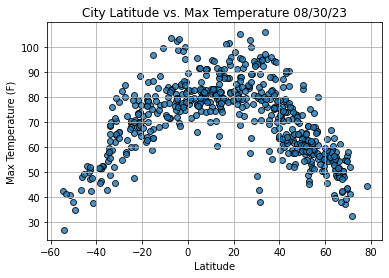

In [23]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

In [24]:
# The balance of the scatter plots will share the same format. 
# All that we need to do is change the v-axis variable for each weather parameter. 

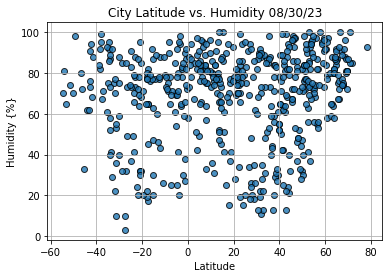

In [25]:
# Mod 6.3.2 Plot Latitude vs Humidity
# Build the scatter plot for latitude vs. Humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity {%}")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()


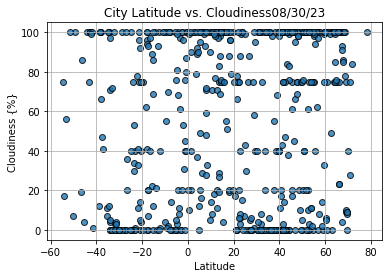

In [26]:
# Mod 6.3.3 Plot Latitude vs Cloudiness
# Build the scatter plot for latitude vs. Cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness"+ time.strftime("%x"))
plt.ylabel("Cloudiness {%}")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

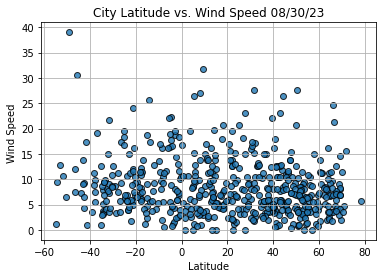

In [27]:
# Mod 6.3.4 Plot Latitude vs Wind Speed
# Build the scatter plot for latitude vs. Wind Speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed ")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [28]:
# Mod 6.4.1 Use Linear Regression fo Find the Relationships between Variables.

# Import lineregress
from scipy.stats import linregress
import matplotlib.pyplot as plt

###   y = mx + b
####  where y is the dependent variable, m is the slope of the line, x is the independent variable, and b is the y-intercept.

#### Linear Regression is used to find a relationship between a dependent variable and one or more independent variables.

#### Independent Variable - plotted on the x-axis. The variable changed by the analyst to observe how it affects
#### the dependent variable.

#### The regression line is a straight trendline predicting the average y-value, or dependent variable, for 
#### a giver x-value, or independent variable.

#### To determine how strong the relationship is between the fitted line and the data, we find the correlation cofficient, or r-value.

#### A correlation coefficient close to 1 shows a strong positive correlation, whereas a correlation coefficient close to -1
#### shows a strong negative correlation. A correlation coefficient close to 0 shows no correlation.

#### In statistics, the p-value is used to determine the significance of results. In most cases, data scientists like to uses
#### a significance level of 0.05, which means: 

##### a linear regression with a p-value > 0.05 is not statistically significant,
##### a linear regression with a p-value < 0.05 is statistically significant.

#### p-values can also be used to reject a null hypothesis. 

In [29]:
# Create a function to create / perform linear regression on the weather data.
# and plot a regression line and the equation with the data.

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run the regresssion on the hemisphere data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    print(f'The correlation coefficient for this reqression is: {r_value:.4f}.')
    
    # Calculate the regression line "y"values from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y= " + str(round(slope, 2)) + "x +" + str(round(intercept, 2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.show()

In [30]:
# Create the Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# NOTE: the loc() method accesses a group of rows and columns in the
# current DataFrame by an index, labels, or boolean array.

# The syntax to get a specific row from a current DataFrame is:
# row = df.loc[row_index1 : row_index2]
#northern_hemi_df.reset_index()

# See examples of using .loc function to filter values for different column.
# Also USover example for index value filtering.

US = northern_hemi_df.loc[(northern_hemi_df['Country'] == 'US')]
US.head(50)
USover = northern_hemi_df.loc[0:5]
USover
overcastUSLat35to45 = northern_hemi_df.loc[(northern_hemi_df['Country'] == 'US') 
                                       & (northern_hemi_df['Current Description'] == 'overcast clouds')  
                                       & (northern_hemi_df['Lat'] >= 35) 
                                       & (northern_hemi_df['Lat'] <= 40)]
overcastUSLat35to45
USover = overcastUSLat35to45.loc[0:500]
USover
len(USover)


# If we want to get all the Northern Hemisphere latitudes, for latitudes >= 0, 
# we can filter the city_data_df DataFrame using the code city_data_df['Lat'] >= 0 (see above)

0

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

The correlation coefficient for this regression is: -0.7346.


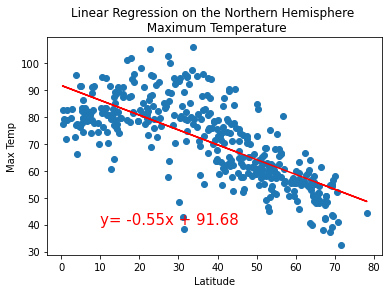

In [32]:
# Perform then linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(f'The correlation coefficient for this regression is: {r_value:.4f}.')

# Calculate the regression line "y values" from the slope and intercept
regress_values = x_values * slope + intercept

# Get the equation of the line.
line_eq = "y= " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Create a scatter plot of the x and y values
plt.scatter(x_values, y_values)
# Plot the regression line with the x-values and the y-coordinates based on the slope and intercept.
plt.plot(x_values, regress_values, "r")
# Annotate the text for the line equation and add its coordinates
plt.annotate(line_eq, (10, 40), fontsize=15, color="red")
plt.title('Linear Regression on the Northern Hemisphere \n Maximum Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()



The correlation coefficient for this reqression is: -0.7346.


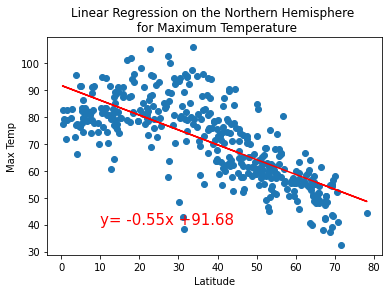

In [33]:
# Linear regression of the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df['Max Temp']
# Call the plot_linear_regression function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp', (10, 40))


The correlation coefficient for this reqression is: 0.8076.


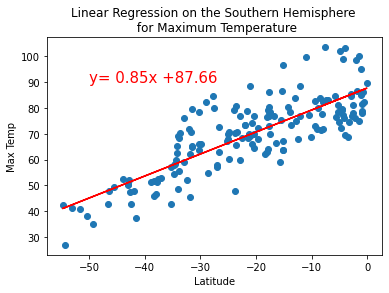

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))



In [35]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

0.8076349193679944


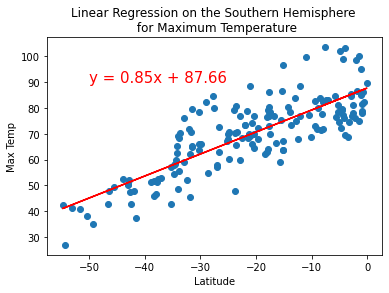

In [36]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(r_value)

# Calculate the regression line "y values" from the slope and intercept.
regress_values = x_values * slope + intercept

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values.
plt.scatter(x_values,y_values)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(x_values,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (-50,90), fontsize=15, color="red")
plt.title('Linear Regression on the Southern Hemisphere \n for Maximum Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

The correlation coefficient for this reqression is: 0.1100.


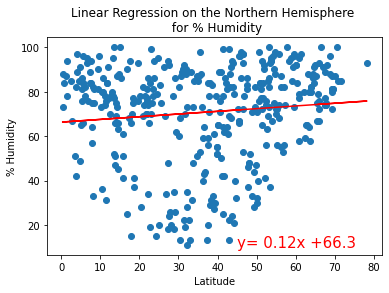

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(45,10))

The correlation coefficient for this reqression is: -0.0406.


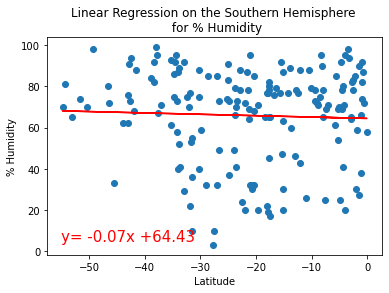

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-55,5))

The correlation coefficient for this reqression is: 0.0143.


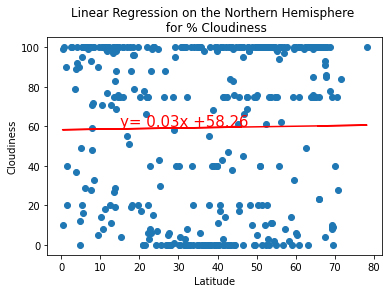

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', 'Cloudiness', (15,60))

The correlation coefficient for this reqression is: 0.0037.


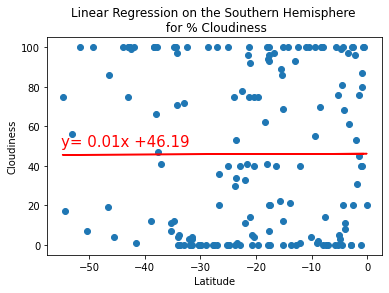

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', 'Cloudiness', (-55,50))

The correlation coefficient for this reqression is: -0.1058.


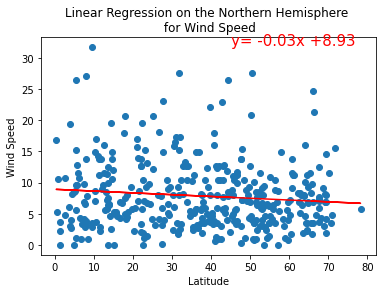

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(45,32))

The correlation coefficient for this reqression is: -0.0255.


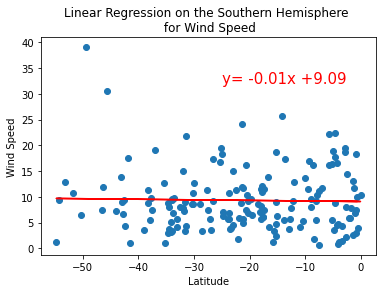

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-25,32))